In [ ]:
!pip install wandb

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import layers
import wandb
from wandb.keras import WandbCallback


In [ ]:
wandb.init(project='mnist')

In [4]:


config=wandb.config
config.learning_rate=0.001



In [ ]:
dataset=tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=dataset.load_data()
(X_train_deep,Y_train_deep),(X_test_deep,Y_test_deep)=dataset.load_data()

5


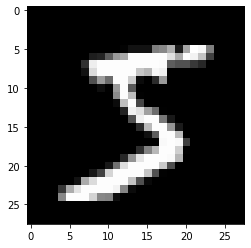

In [6]:
plt.imshow(X_train[0],cmap='gray')
print(Y_train[0])

In [7]:
print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])

(60000, 28, 28)


In [8]:
X_train.shape

(60000, 784)

In [9]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [10]:
X_train,X_val,X_test = X_train / 255.0,X_val/255.0,X_test / 255.0

In [11]:
#mlp
model=tf.keras.models.Sequential([
    Dense(64,input_dim=X_train.shape[1],activation='relu'),#input_layer
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')#output_layer

])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [13]:
output=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=10,callbacks=[WandbCallback()])

Epoch 1/10
1500/1500 [==============================] - 8s 4ms/step - loss: 0.3245 - accuracy: 0.9085 - val_loss: 0.1804 - val_accuracy: 0.9459 - _timestamp: 1646731069.0000 - _runtime: 21.0000
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1489 - accuracy: 0.9558 - val_loss: 0.1372 - val_accuracy: 0.9596 - _timestamp: 1646731075.0000 - _runtime: 27.0000
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1093 - accuracy: 0.9672 - val_loss: 0.1130 - val_accuracy: 0.9648 - _timestamp: 1646731081.0000 - _runtime: 33.0000
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0870 - accuracy: 0.9730 - val_loss: 0.1002 - val_accuracy: 0.9686 - _timestamp: 1646731086.0000 - _runtime: 38.0000
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0713 - accuracy: 0.9775 - val_loss: 0.1066 - val_accuracy: 0.9673 - _timestamp: 1646731092.0000 - _runtime: 44.0000
Epoch 6/10
1500/1500 [========

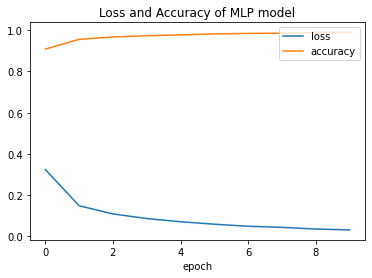

In [14]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and Accuracy of MLP model')
plt.show()

In [15]:
print(X_test.shape)
print(Y_test.shape)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print(X_test.shape)

(10000, 28, 28)
(10000,)
(10000, 784)


In [16]:

accuracy = model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.1071 - accuracy: 0.9695


In [17]:
X_train_deep,X_val_deep,Y_train_deep,Y_val_deep=train_test_split(X_train_deep,Y_train_deep,test_size=0.2,random_state=42)

In [18]:
X_train_deep,X_val_deep,X_test_deep = X_train_deep / 255.0,X_val_deep/255.0,X_test_deep / 255.0

In [19]:
model_deep=tf.keras.models.Sequential([
                                  layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                  layers.MaxPooling2D(),
                                  layers.Conv2D(64,(3,3),activation='relu'),
                                  layers.MaxPooling2D(),
                                  layers.Conv2D(64,(5,5),activation='relu'),

                                  layers.Flatten(),

                                  layers.Dense(64,activation='relu'),
                                  layers.Dense(10,activation='softmax')

])

In [20]:
model_deep.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 64)          102464    
                                                                 
 flatten (Flatten)           (None, 64)               

In [21]:
model_deep.compile(tf.keras.optimizers.SGD(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [22]:
output_deep=model_deep.fit(X_train_deep,Y_train_deep,epochs=10,callbacks=[WandbCallback()])

Epoch 1/10
1500/1500 [==============================] - 17s 7ms/step - loss: 2.1998 - accuracy: 0.2961 - _timestamp: 1646731142.0000 - _runtime: 94.0000
Epoch 2/10
1500/1500 [==============================] - 10s 6ms/step - loss: 1.3623 - accuracy: 0.6787 - _timestamp: 1646731151.0000 - _runtime: 103.0000
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5353 - accuracy: 0.8483 - _timestamp: 1646731161.0000 - _runtime: 113.0000
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3875 - accuracy: 0.8889 - _timestamp: 1646731170.0000 - _runtime: 122.0000
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3275 - accuracy: 0.9040 - _timestamp: 1646731180.0000 - _runtime: 132.0000
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2885 - accuracy: 0.9142 - _timestamp: 1646731189.0000 - _runtime: 141.0000
Epoch 7/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2

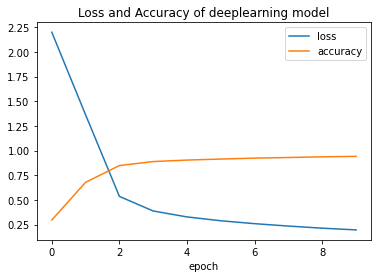

In [23]:
plt.plot(output_deep.history['loss'])
plt.plot(output_deep.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and Accuracy of deeplearning model')
plt.show()

In [24]:
model_deep.evaluate(X_test_deep,Y_test_deep)

313/313 [==============================] - 2s 5ms/step - loss: 0.1684 - accuracy: 0.9520


[0.16840264201164246, 0.9520000219345093]